#### 맷플롯립

시각화 도구 모듈. 다양한 차트를 활용 가능
- 공식 웹 사이트 : https://matplotlib.org/

맷플롯립 대체 모듈
- Seaborn : https://seaborn.pydata.org/

##### 맷플롯립 설치

- matplotlib inline (기본으로 설치되어 있음)

```python
%matplotlib inline
```

- matplotlib 설치

```python
!pip install matplotlib

import matplotlib
```

In [1]:
!pip install matplotlib

In [2]:
# 추가 seaborn 설치
!pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -------------------------------------  286.7/293.3 kB 6.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 6.2 MB/s eta 0:00:00


##### matplotlib 사용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
arr = np.random.randn(30)
arr

array([-1.72347636, -1.60282349,  0.67758807, -0.31445903, -0.80707584,
        1.14338256,  0.98997855,  0.62716692, -0.22930546, -1.57451194,
        0.3674086 , -2.16401241,  1.19126108, -1.08844296, -0.62329061,
       -0.24683546, -0.13192361,  1.02811521, -0.40828753, -0.88702766,
       -1.44170439,  1.11752565, -1.5322452 ,  1.23835602,  1.32094332,
       -0.65704874, -0.81477271,  0.69139421, -2.29611232, -1.00477423])

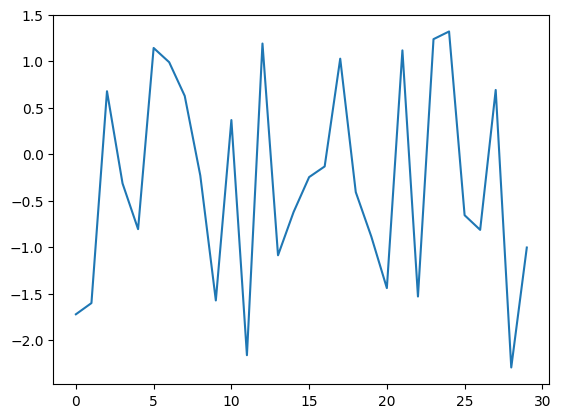

In [6]:
# 단일차트
plt.plot(arr)

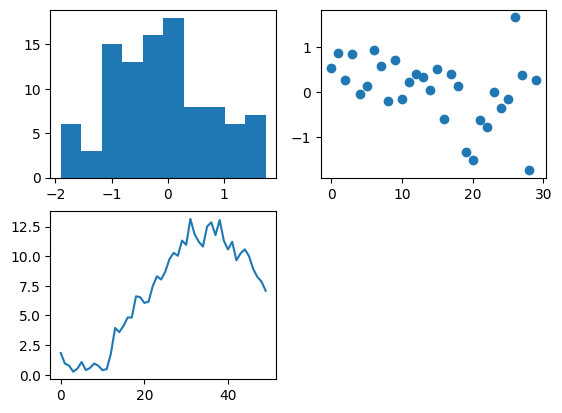

In [9]:
# 다중차트
fig = plt.figure() # figure 객체 생성
ax1 = fig.add_subplot(2, 2, 1) # 차트1(2행 2열 차트 중 1)
ax2 = fig.add_subplot(2, 2, 2) # 차트2(2행 2열 차트 중 2)
ax3 = fig.add_subplot(2, 2, 3) # 차트3(2행 2열 차트 중 3)

ax1.hist(np.random.randn(100)) # 분포표
ax2.scatter(np.arange(30), np.random.randn(30)) # 스캐터차트
ax3.plot(np.random.randn(50).cumsum()) # 라인차트

plt.show() # 차트 보기

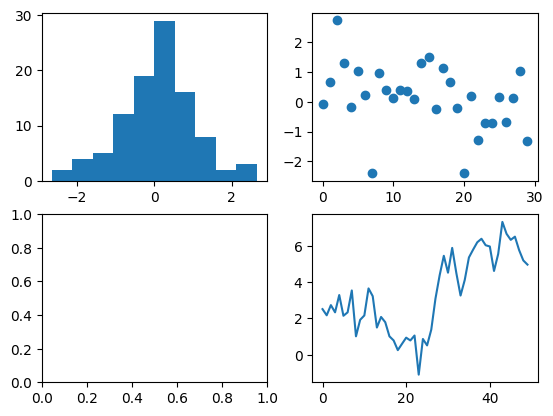

In [13]:
# 안 쓰는 차트도 같이 화면에 나옴
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(np.random.randn(100)) # 분포표
axes[0][1].scatter(np.arange(30), np.random.randn(30)) # 스캐터차트
axes[1][1].plot(np.random.randn(50).cumsum()) # 라인차트

plt.show()

##### 차트 꾸미기

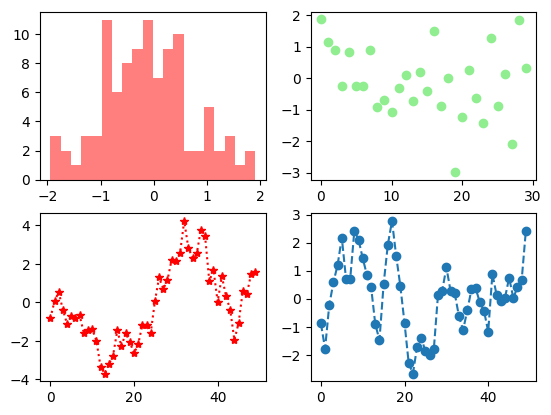

In [29]:
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(np.random.randn(100), bins=20, color='red', alpha=0.5) # bins = 범위 20개로 늘림(기본 10개), alpha : 투명도(0.0[투명] ~ 1.0[불투명])
axes[0][1].scatter(np.arange(30), np.random.randn(30), color='lightgreen')
axes[1][0].plot(np.random.randn(50).cumsum(), linestyle=':', color='red', marker='*') # marker = 값 위치 표시, *(별), ^(삼각형), 점, 쉼표, o(동그라미)
axes[1][1].plot(np.random.randn(50).cumsum(), linestyle='--', marker='o') # linestyle = 선 종류, -(일반), --(대시), :(점), -.(선과 점)

plt.show()

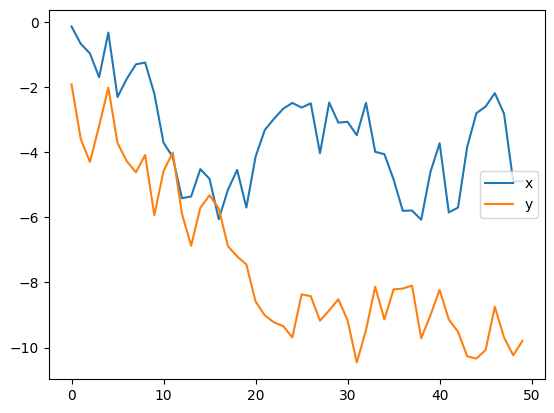

In [38]:
# 범례 legend
plt.plot(np.random.randn(50).cumsum(), label='x')
plt.plot(np.random.randn(50).cumsum(), label='y')
plt.legend(loc='right') # 'upper left, 'upper right', 'lower left', 'lower right'

plt.show()

#### Pandas 데이터프레임, 시리즈

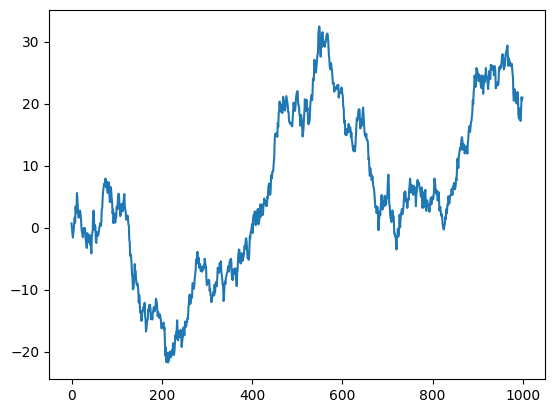

In [39]:
# 판다스 시리즈
pd.Series(np.random.randn(1000).cumsum()).plot()
plt.show()

<Axes: >

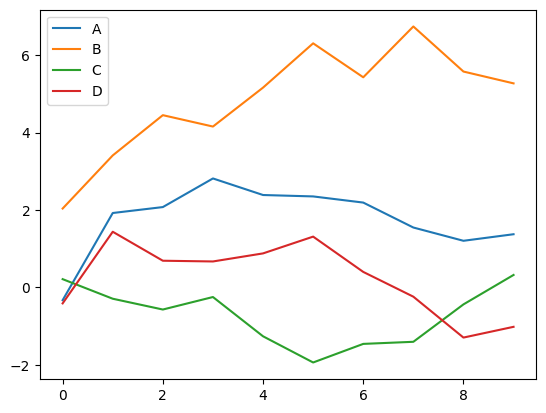

In [46]:
# 데이터 프레임
pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D']).plot()

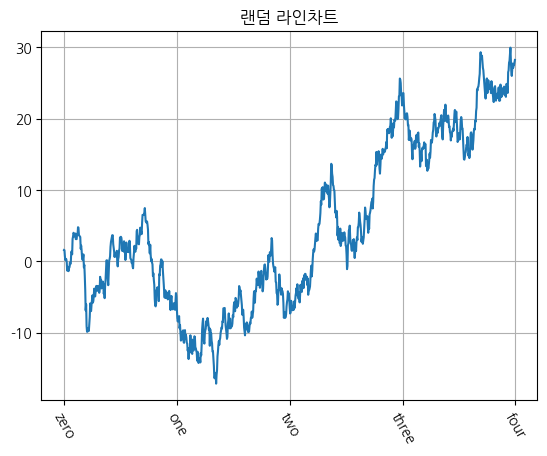

In [61]:
# 한글 깨짐현상
import matplotlib
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 한글 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 사용 시 마이너스 깨짐현상 해결

# x, y축 설정
chart = pd.Series(np.random.randn(1000).cumsum()).plot()
chart.set_xticks([0, 250, 500, 750, 1000]) # x축 간격 조정
# chart.set_yticks([0, 25, 50]) # y축 간격 조정
chart.set_title('랜덤 라인차트') # 영어는 잘 나오는데 한글은 기본 깨짐
chart.set_xticklabels(['zero', 'one', 'two', 'three', 'four'], rotation=300) # x축을 라벨로 표시
chart.grid(True) # 그리드선 표시

plt.show() # 쓸데없는 타입, 결과 메세지 삭제

##### 예제 연습

- 캐글 타이타닉 연습문제 CSV

https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv

In [62]:
train = pd.read_csv('https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv')

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [65]:
# 성별 생존률 교차도표 생성
gender_survived = pd.crosstab(train['Sex'], train['Survived'])
gender_survived.columns = gender_survived.columns.map({0:"Dead", 1:"Alive"})

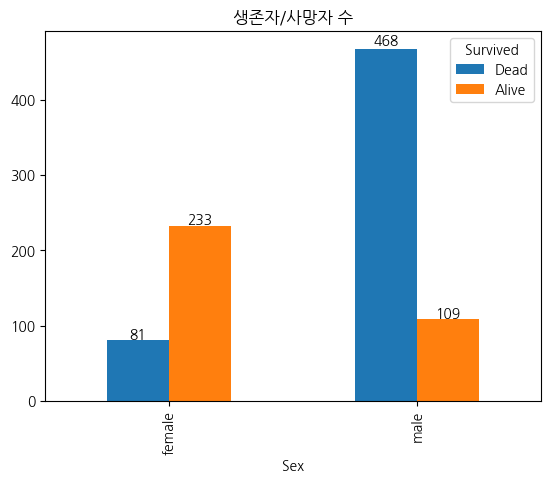

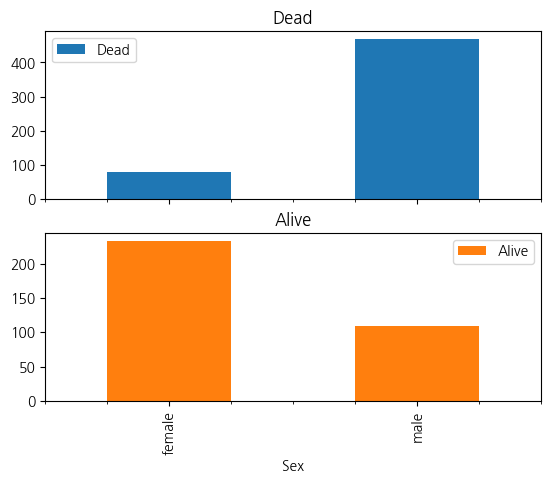

In [77]:
# bar = gender_survived.plot.bar() # 바차트
bar = gender_survived.plot(kind='bar', title='생존자/사망자 수')

# 차트의 수치표시
for p in bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    bar.annotate(f'{height:n}', (left + width / 2, height * 1.01), ha='center')

gender_survived.plot.bar(subplots=True) # 성별로 따로 바차트를 추가 생성
# bar.set_title('생존자/사망자 수')

# gender_survived.plot.bar(x='Alive') # 차트는 사망자, x축에는 생존자 수치가 표시됨(차트와 x 라벨을 교차해서 사용 : 쓸 일 없음)
# gender_survived.plot.bar(x='Dead')
# gender_survived.plot.bar(y='Dead)

plt.show()

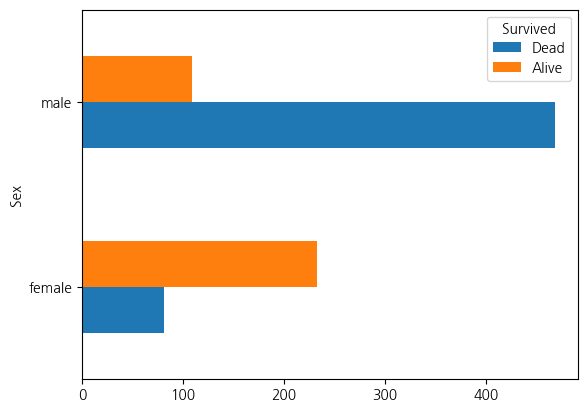

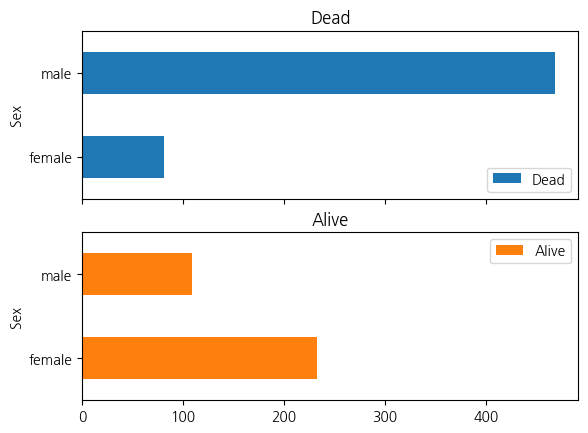

In [81]:
# 가로 바차트
# gender_survived.plot(kind="barh")
gender_survived.plot.barh()
gender_survived.plot.barh(subplots=True)
plt.show()

<Axes: xlabel='Sex'>

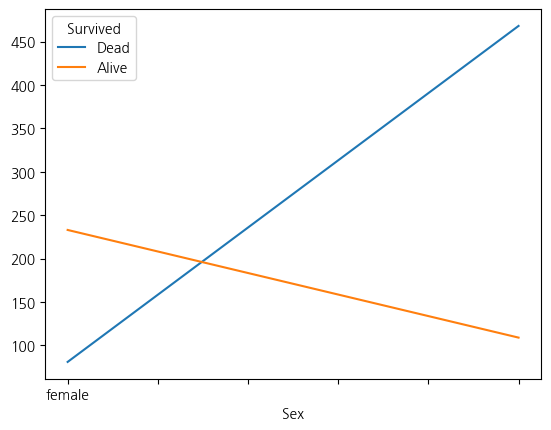

In [82]:
# 라인차트
gender_survived.plot(kind='line')

<Axes: title={'center': '생존자 비율'}, ylabel='Alive'>

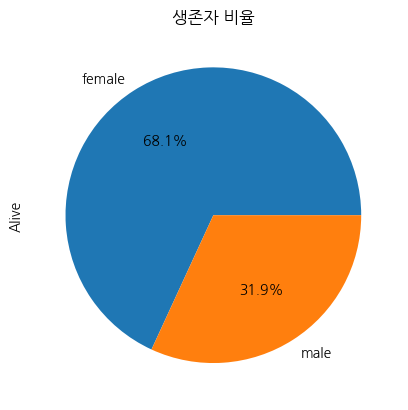

In [86]:
# 파이차트
gender_survived['Alive'].plot(kind='pie', title='생존자 비율', autopct='%1.1f%%') # autopct : 퍼센테이지 보여줌

<Axes: title={'center': '사망자 비율'}, ylabel='Dead'>

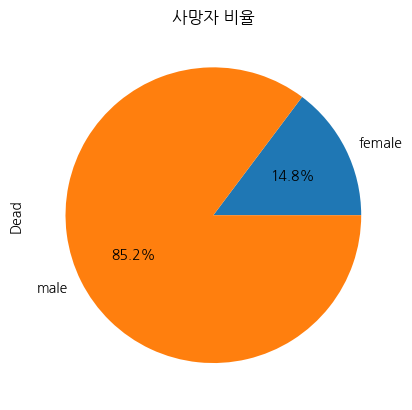

In [87]:
gender_survived['Dead'].plot(kind='pie', title='사망자 비율', autopct='%1.1f%%') # autopct : 퍼센테이지 보여줌